<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"  style="height:65%" align="right">


# Lista 2 - NN & Backpropagation
**Nome:** AUGUSTO CESAR DE CAMARGO NETO

**Numero Usp:** 11891023


_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [71]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.python.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_notebook
%matplotlib inline
tf.__version__

ModuleNotFoundError: No module named 'keras'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simpes possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo perceptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [280]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [281]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)


100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [282]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 663us/step - loss: 1373.1978
Epoch 2/300
4/4 [==============================] - 0s 407us/step - loss: 3.1641
Epoch 3/300
4/4 [==============================] - 0s 449us/step - loss: 2.9616
Epoch 4/300
4/4 [==============================] - 0s 384us/step - loss: 2.8655
Epoch 5/300
4/4 [==============================] - 0s 416us/step - loss: 2.7206
Epoch 6/300
4/4 [==============================] - 0s 488us/step - loss: 2.7362
Epoch 7/300
4/4 [==============================] - 0s 575us/step - loss: 2.5156
Epoch 8/300
4/4 [==============================] - 0s 476us/step - loss: 2.4457
Epoch 9/300
4/4 [==============================] - 0s 424us/step - loss: 2.3671
Epoch 10/300
4/4 [==============================] - 0s 451us/step - loss: 2.2801
Epoch 11/300
4/4 [==============================] - 0s 372us/step - loss: 2.1652
Epoch 12/300
4/4 [==============================] - 0s 376us/step - loss: 2.0723
Epoch 13/300
4/4 [================

In [283]:
model.summary()

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_374 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [284]:
print("prediction: "+ str(model.predict([5]))+"      real value: " + str(f1(5)))

prediction: [[54.998512]]      real value: 55


In [285]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 [==============================] - 0s 539us/step - loss: 2.1254e-05


2.125351966242306e-05

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE). 

## Aprendendo uma função não linear

In [286]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [287]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

In [288]:
# A rede foi definida abaixo como uma função para poder testar várias funçcões de ativação
# A saída unitária não deve ter função de ativação pq não iremos normalizar os dados de saída.

In [289]:
def job(activation,optimizer,loss):
        #create model
        model = tf.keras.Sequential([    
            keras.Input(shape=(1,)),
            keras.layers.Dense(units=32,activation=activation),
            keras.layers.Dense(units=128,activation=activation),
            keras.layers.Dense(units=8,activation=activation),
            keras.layers.Dense(units=1),
        ])

        #compile model
        model.compile(optimizer=optimizer, loss=loss)     

        #fit model
        history = model.fit(x,y,epochs=400,verbose=0)

        # list all data in history
        #    print(history.history.keys())
        
        #summary = model.summary()
        x_val = np.linspace(0,10,63)
        y_val = f2(x_val)
        x_val_tensor =  tf.convert_to_tensor(x_val)
        loss = model.evaluate(x=x_val_tensor,y=y_val)
        
        #calculate extrapolations
        fx_= np.array([])
        pred_ =  np.array([])
        for i in range(-100,100):
            pred = model.predict([i])[0][0]
            f= f2(i)
            fx_ = np.insert(fx_,len(fx_),f)
            pred_ = np.insert(pred_,len(pred_),pred)
        er = (f-pred)/f*100
        
        return history, loss, fx_, pred_, model
        

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbolica



In [290]:
# Para a rede em questão utilizando 3 funções de ativação diferentes os resultados foram muito semelhantes. Vide o loss abaixo e os gráficos de prediction logo a seguir.
# Somente a sigmoid precisa de mais tempo para convergir para um bom resultado de loss. Neste experimento a tanh não tem comportamento diferente das outras.

In [291]:
#execute jobs with different activate functions
history_relu, loss_relu, fx_relu, pred_relu,model_relu=job("relu","adam","mean_squared_error")
history_sigmoid, loss_sigmoid, fx_sigmoid, pred_sigmoid,model_sigmoid=job("sigmoid","adam","mean_squared_error")
history_tanh, loss_tanh, fx_tanh, pred_tanh,model_tanh=job("tanh","adam","mean_squared_error")
history_sgd, loss_sgd, fx_sgd, pred_sgd,model_sgd=job("relu","sgd","mean_squared_error")
history_rmsprop, loss_rmsprop, fx_rmsprop, pred_rmsprop,model_rmsprop=job("relu","rmsprop","mean_squared_error")

2/2 [==============================] - 0s 698us/step - loss: 3.4320e-05


In [292]:
print("loss_relu: " + str(loss_relu))
print("loss_sigmoid: " + str(loss_sigmoid))
print("loss_tanh:" + str(loss_tanh))

loss_relu: 8.540822818758897e-06
loss_sigmoid: 0.00019380627782084048
loss_tanh:0.0001587799342814833


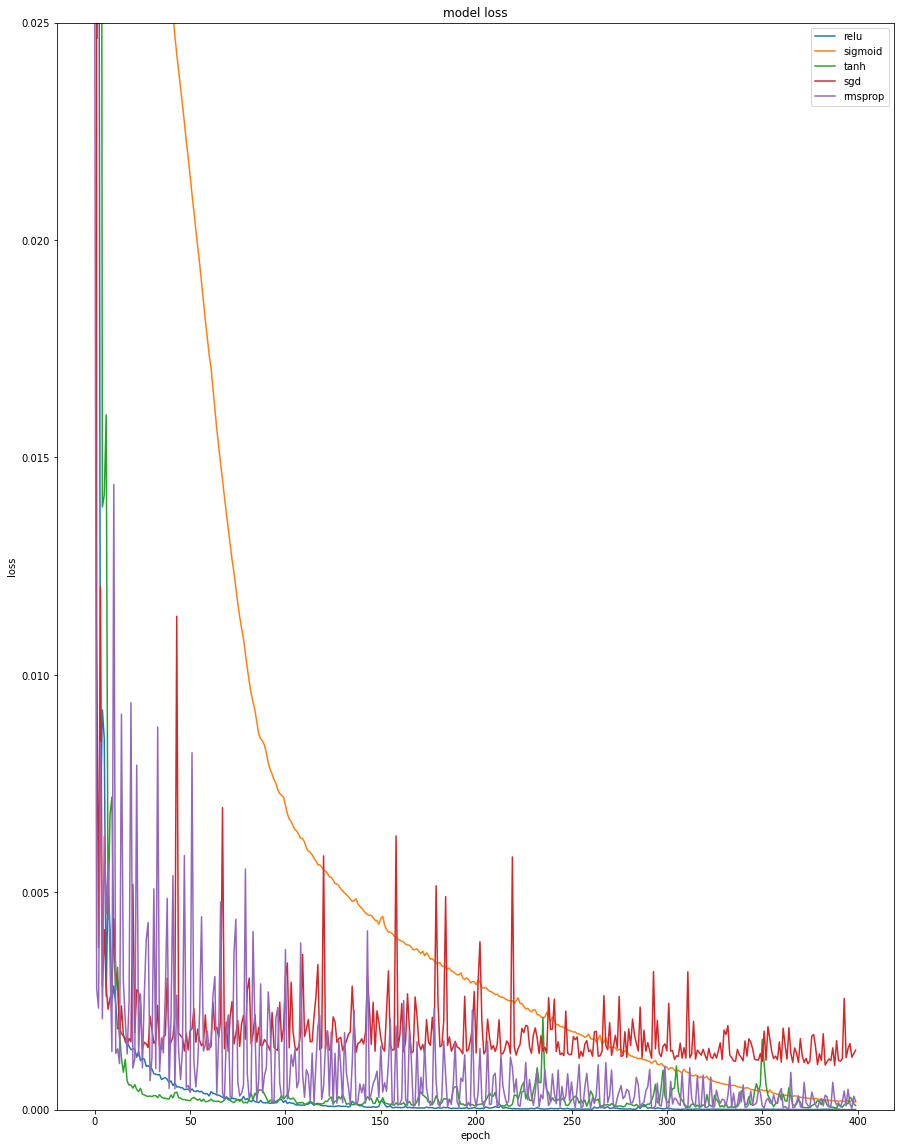

In [302]:
# plot history for losses
line, = plt.plot(history_relu.history['loss'], label='relu')
plt.legend()
line, = plt.plot(history_sigmoid.history['loss'], label= 'sigmoid')
plt.legend()
line, = plt.plot(history_tanh.history['loss'], label= 'tanh')
plt.legend()
line, = plt.plot(history_sgd.history['loss'], label= 'sgd')
plt.legend()
line, = plt.plot(history_rmsprop.history['loss'], label= 'rmsprop')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.rcParams["figure.figsize"] = (15,20)
plt.ylim(0, .025)
plt.show()

O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop

In [294]:
# Vide os resultados de loss e predict (print e gráficos) pode-se verificar que os resultados de sgd e rmsprop tem performance pior que adams
# em mais de 1 ordem de grandeza.

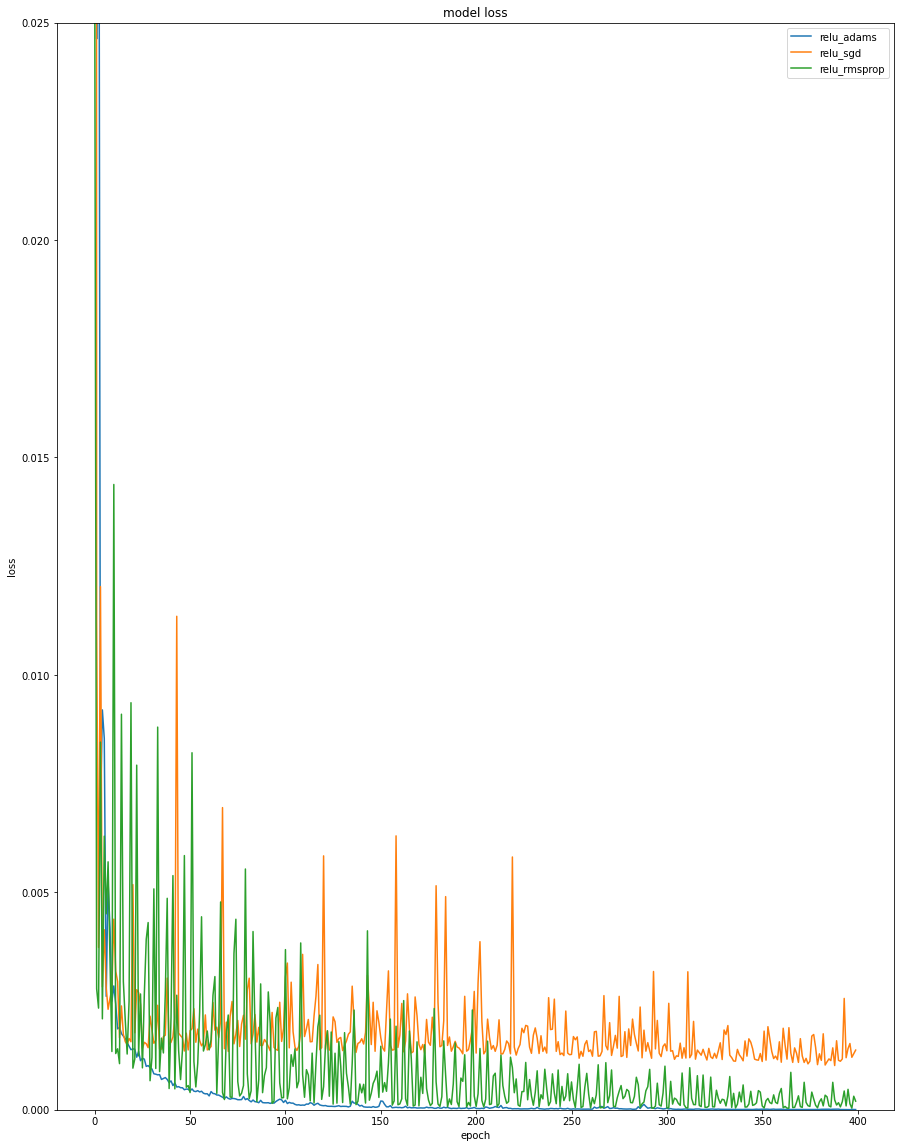

loss_relu: 8.540822818758897e-06
loss_sgd: 0.0020867714192718267
loss_rmsprop: 3.4319746191613376e-05


In [295]:
# plot history for different optimizers
line, = plt.plot(history_relu.history['loss'], label='relu_adams')
plt.legend()
line, = plt.plot(history_sgd.history['loss'], label= 'relu_sgd')
plt.legend()
line, = plt.plot(history_rmsprop.history['loss'], label= 'relu_rmsprop')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.rcParams["figure.figsize"] = (15,20)
plt.ylim(0, .025)
plt.show()
print("loss_relu: " + str(loss_relu))
print("loss_sgd: " + str(loss_sgd))
print("loss_rmsprop: " + str(loss_rmsprop))

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?


In [296]:
# O modelo não converge, não aprende, o loss não cai e as predições dele tem muito erro.

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [307]:
# Fora do intervalo de treino as performances das três funções de ativação são péssimas.
# Vide os resultados de model.evaluate de cada uma e o gráfico (as duas barras verticais simbolizam o intervalo [0;10]) logo abaixo.

relu
4/4 [==============================] - 0s 635us/step - loss: 15.8625
sigmoid
4/4 [==============================] - 0s 1ms/step - loss: 36.5323
tanh
4/4 [==============================] - 0s 782us/step - loss: 30.1943


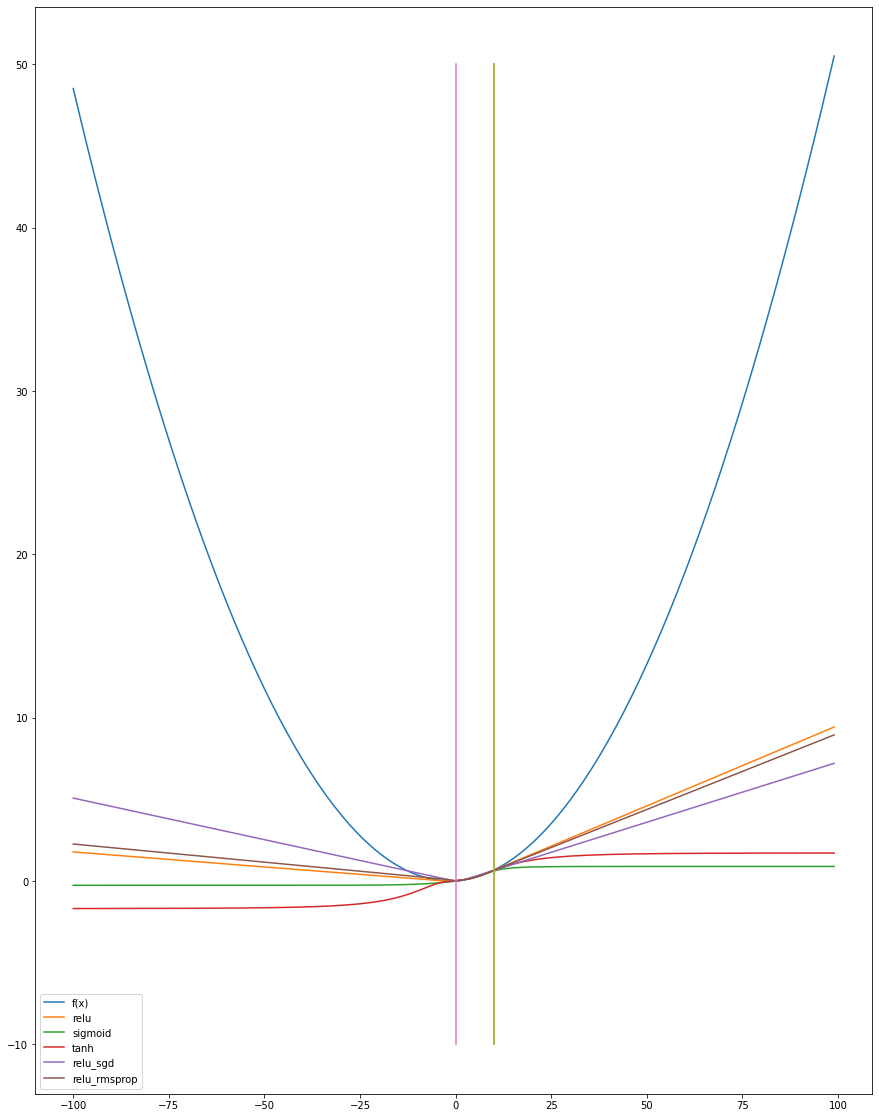

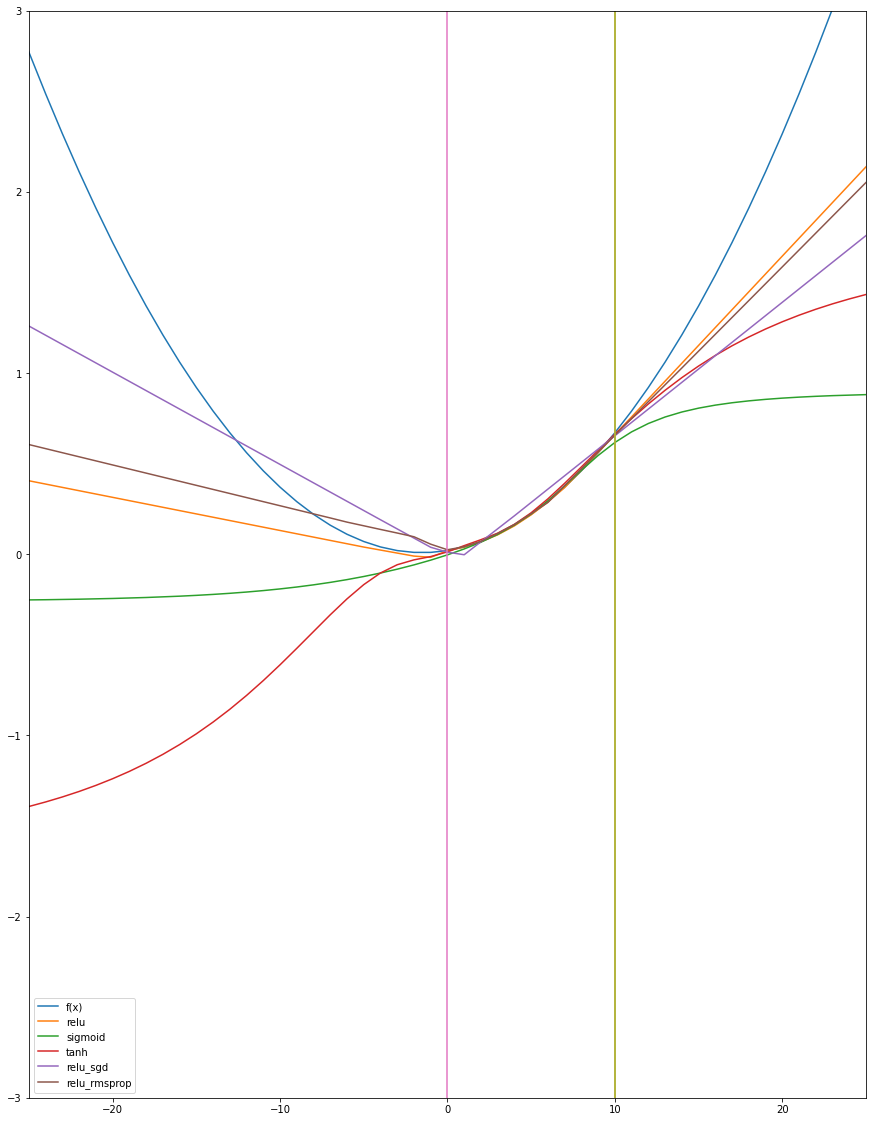

In [306]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

# análise  de performance fora extrapolações
x_val = np.linspace(10,50,100)
y_val = f2(x_val)
print('relu')
model_relu.evaluate(x=x_val,y=y_val)
print('sigmoid')
model_sigmoid.evaluate(x=x_val,y=y_val)
print('tanh')
model_tanh.evaluate(x=x_val,y=y_val)

line, = plt.plot(range(-100,100),fx_relu, label='f(x)')
plt.legend()
line, = plt.plot(range(-100,100),pred_relu,label='relu')
plt.legend()
line, = plt.plot(range(-100,100),pred_sigmoid,label='sigmoid')
plt.legend()
line, = plt.plot(range(-100,100),pred_tanh,label='tanh')
plt.legend()
line, = plt.plot(range(-100,100),pred_sgd,label='relu_sgd')
plt.legend()
line, = plt.plot(range(-100,100),pred_rmsprop,label='relu_rmsprop')
plt.legend()
plt.rcParams["figure.figsize"] = (15,20)
x_coordinates = [0, 0]
y_coordinates = [-10, 50]
plt.plot(x_coordinates, y_coordinates)
x_coordinates = [10, 10]
y_coordinates = [-10, 50]
plt.plot(x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates)
plt.show()

line, = plt.plot(range(-100,100),fx_relu, label='f(x)')
plt.legend()
line, = plt.plot(range(-100,100),pred_relu,label='relu')
plt.legend()
line, = plt.plot(range(-100,100),pred_sigmoid,label='sigmoid')
plt.legend()
line, = plt.plot(range(-100,100),pred_tanh,label='tanh')
plt.legend()
line, = plt.plot(range(-100,100),pred_sgd,label='relu_sgd')
plt.legend()
line, = plt.plot(range(-100,100),pred_rmsprop,label='relu_rmsprop')
plt.legend()
plt.rcParams["figure.figsize"] = (15,20)
x_coordinates = [0, 0]
y_coordinates = [-10, 50]
plt.plot(x_coordinates, y_coordinates)
x_coordinates = [10, 10]
y_coordinates = [-10, 50]
plt.plot(x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates)
plt.xlim(-25, 25)
plt.ylim(-3, 3)
plt.show()

# Prevendo se vai chover na Austrália

## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisara escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
def visualize_data(data):
    """Gera graficos das distribuicoes das features e salva em disco"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly
    plt.figure(figsize=(8, 6))

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.savefig('data_RainToday.png')
    plt.clf()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.savefig('data_Rainomorrow.png')
    plt.clf()

    # Humidity3pm:
    sns.set()
    sns.distplot(data.Humidity3pm, color=ibm_pltt[0])
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.savefig('data_Humidity3pm.png')
    plt.clf()

    # Pressure9am:
    sns.set()
    sns.distplot(data.Pressure9am, color=ibm_pltt[4])
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.savefig('data_Pressure9am.png')
    plt.clf()

    # Rainfall:
    sns.set()
    sns.distplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.savefig('data_Rainfall.png')
    plt.clf()

    plt.show()
    
    return


# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras.models
from keras.models import Sequential
from keras.layers import Dense
from keras.constraints import maxnorm
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    #Seu código aqui
    df = pd.read_csv(data_path, encoding='utf-8',engine='python')
    raw_data = df
    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    #Seu código aqui
    raw_data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
    raw_data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)
    raw_data = raw_data.dropna(how='any')
    mms = MinMaxScaler()
    #for a in raw_data:
    #    if (a in {'Rainfall','Humidity3pm', 'Pressure9am','RainToday'}):
    #        raw_data[a]=mms.fit_transform(raw_data[[a]])
        
    processed_data = raw_data
    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    #Seu código aqui
    X = data[['Rainfall','Humidity3pm', 'Pressure9am','RainToday']]
    y = data[['RainTomorrow']]    
    RANDOM_SEED = 42
    np.random.seed(RANDOM_SEED)
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
    return x_train, x_val, y_train, y_val


In [74]:
df = load_data("data/weatherAUS.csv")
df = pre_processing(df)
print(df.head())
print(df.shape)
visualize_data(df)
x_train, x_val, y_train, y_val = split_data(df,)
print(df.RainTomorrow.value_counts() / df.shape[0])
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

            Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5939  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
5940  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
5942  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
5943  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
5944  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
5939         SSW           48.0        ENE  ...        13.0       1006.3   
5940           S           37.0        SSE  ...         8.0       1012.9   
5942         NNE           46.0        NNE  ...        22.0       1012.3   
5943         WNW           31.0        WNW  ...        22.0       1012.7   
5944         WNW           35.0         NW  ...        15.0       1010.7   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainT

<Figure size 576x432 with 0 Axes>

0    0.779741
1    0.220259
Name: RainTomorrow, dtype: float64
(45136, 4)
(11284, 4)
(45136, 1)
(11284, 1)


# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


# Seu código aqui

In [75]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# define the keras model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(16, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m,'mean_squared_error'])

In [76]:
#x_train, x_val, y_train, y_val = split_data(df,)

In [ ]:
with tf.device("gpu:0"):
    history = model.fit(x_train, y_train, epochs=50, batch_size=10,validation_data=(x_val, y_val),
              verbose=1)

Epoch 1/50
4514/4514 [==============================] - 4s 929us/step - loss: 0.2204 - acc: 0.7796 - f1_m: 1.0225e-04 - precision_m: 6.6460e-05 - recall_m: 2.2153e-04 - mean_squared_error: 0.2204 - val_loss: 0.2202 - val_acc: 0.7798 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_mean_squared_error: 0.2202
Epoch 2/50
4514/4514 [==============================] - 4s 863us/step - loss: 0.2203 - acc: 0.7797 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - mean_squared_error: 0.2203 - val_loss: 0.2202 - val_acc: 0.7798 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_mean_squared_error: 0.2202
Epoch 3/50
4514/4514 [==============================] - 4s 870us/step - loss: 0.2203 - acc: 0.7797 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - mean_squared_error: 0.2203 - val_loss: 0.2202 - val_acc: 0.7798 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [ ]:
y_pred = model.predict(x_val)
print(x_val)
cm = confusion_matrix(y_val, y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['Sem Chuva', 'Com Chuva']

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')